<IPython.core.display.Javascript object>


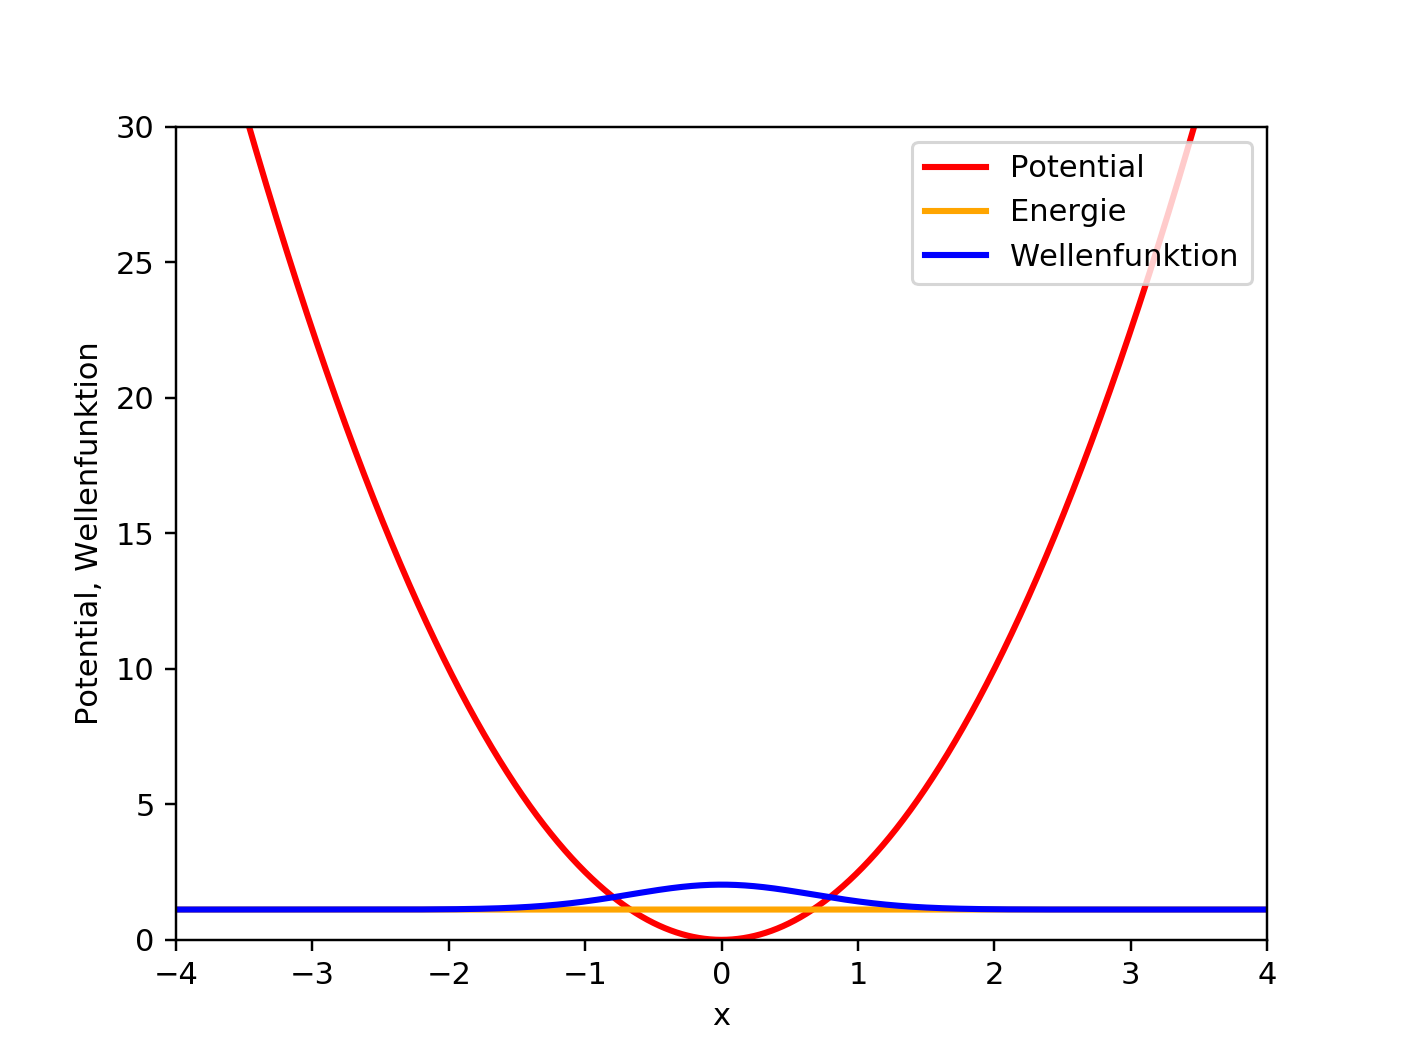

In [2]:
from pylab import *
from ipywidgets import *
%matplotlib notebook

#initial values
kf0=5
nu0=0

#create data
def potential(x, k):
    return 0.5 * k * x**2
def H(z, nu):
    if nu == 0:
        return 1
    elif nu == 1:
        return 2*z
    elif nu >= 2:
        return 2*z*H(z, nu-1)-2*(nu-1)*H(z, nu-2)
    else:
        print("nu has a not allowed value!")
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)
def N(nu, kf):
    return sqrt(kf**(1/float(4)) / (2**nu * math.factorial(nu) * sqrt(pi)))
def energy(x, nu, kf):
    return (nu + 0.5) * sqrt(kf) + x*0
def psi(x, nu, kf):
    return energy(x, nu, kf)+N(nu, kf) * H(kf**(1/float(4))*x, nu) * exp(-0.5*(sqrt(kf)*x**2))
x = arange(-4, 4, 0.001)
y = psi(x, nu0, kf0)
e = energy(x, nu0, kf0)
v = potential(x, kf0)


#create plot
fig1 = figure()
ax1 = fig1.add_subplot(111)
pot_curve, = plot(x, v, lw=2, color='red', label='Potential')
ene_curve, = plot(x, e, lw=2, color='orange', label='Energie')
psi_curve, = plot(x, y, lw=2, color='blue', label='Wellenfunktion')
axis([-4, 4, 0, 30])
xlabel('x')
ylabel('Potential, Wellenfunktion')
l = legend(loc='upper right')

@interact(nu=(0,12), kf=(0.1, 5.0, 0.1), probability=False)
def update(nu=nu0, kf=kf0, probability=False):
    if not probability:
        pot_curve.set_ydata(potential(x, kf))
        psi_curve.set_ydata(psi(x, nu, kf))
        psi_curve.set_label("Wellenfunktion")
        l = legend(loc='upper right')
        ene_curve.set_ydata(energy(x, nu, kf))
        ylabel('Potential, Wellenfunktion')
    else:
        pot_curve.set_ydata(potential(x, kf))
        psi_curve.set_ydata(20*((psi(x, nu, kf)-energy(x, nu, kf))**2))
        psi_curve.set_label("Wahrscheinlichkeitsdichte")
        l = legend(loc='upper right')
        ene_curve.set_ydata(energy(x, nu, kf))
        ylabel('Potential, Wahrscheinlichkeitsdichte*20')